# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


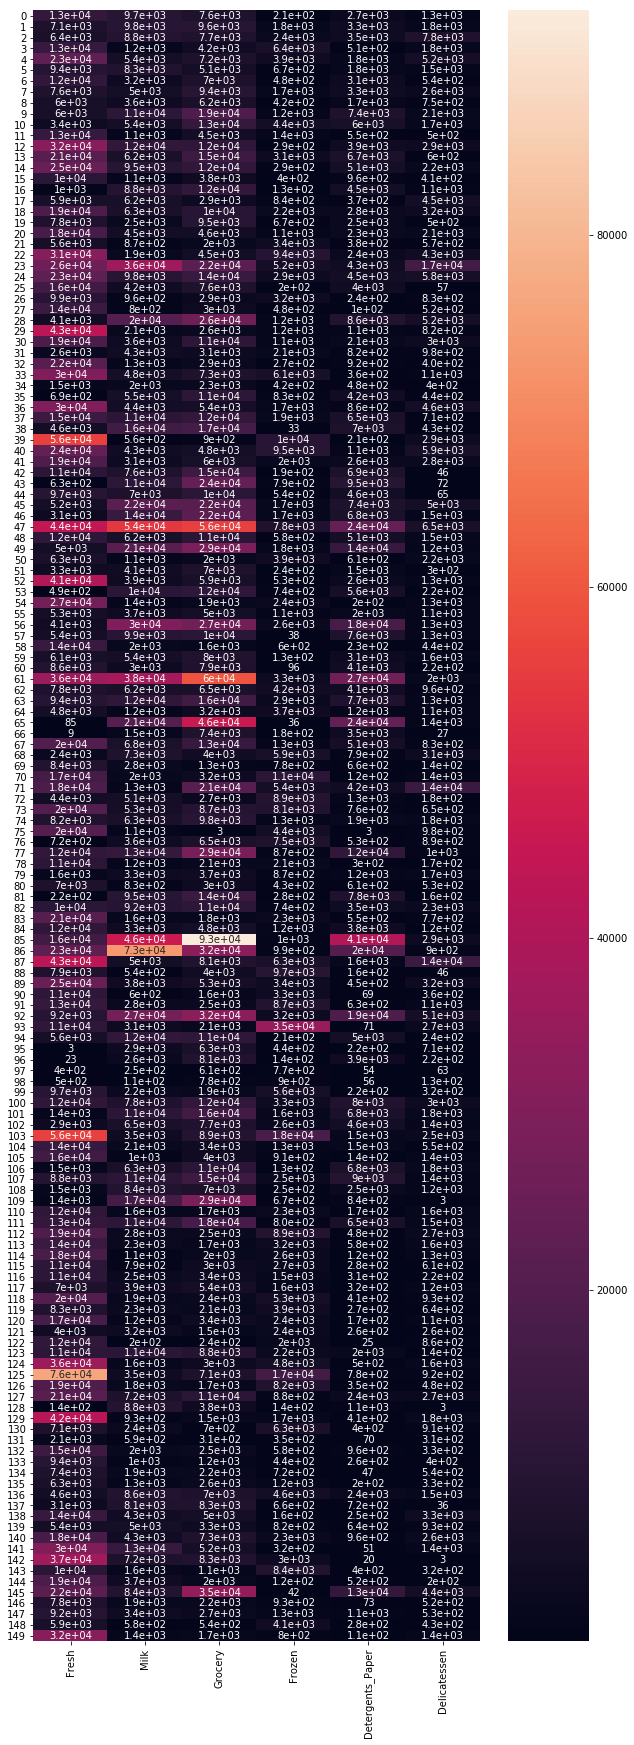

In [197]:
# Display a description of the dataset
display(data.describe())

# Lets make a heatmap of the first 150 entries, get an idea of range
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,30))
sns.heatmap(data[:150], annot=True, ax=ax)

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3,2920,6252,440,223,709
1,112151,29627,18148,16745,4948,8550
2,32717,16784,13626,60869,1272,5609


Chosen samples showing purchase ratios:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.000284,0.276856,0.592775,0.041718,0.021143,0.067223
1,0.589744,0.155793,0.095431,0.088053,0.026019,0.044960
2,0.249983,0.128243,0.104113,0.465086,0.009719,0.042857


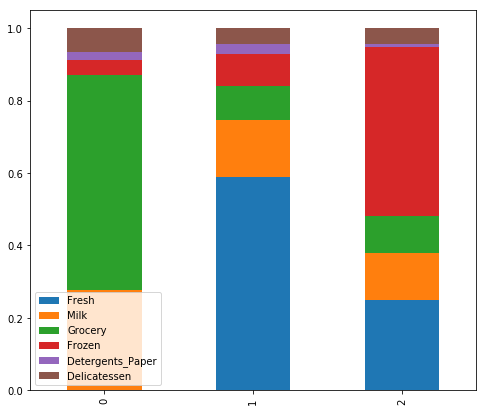

In [146]:
import matplotlib.pyplot as plt

# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [95, 181,325]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)
div = samples.sum(axis=1)
samples_ratio = samples
for i in range(3):
    samples_ratio.iloc[i] = samples_ratio.iloc[i]/div[i]
print("Chosen samples showing purchase ratios:")
display (samples_ratio)

samples_ratio.plot.bar(stacked=True, figsize=(8, 7))

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
Alongside the table showing the customers I chose and their yearly monetary unit (m.u) purchases, I have created a histogram showing the purchasing ratios of the items they consume.  The m.u values will show the size of the customer spend/company size and the ratio will show me the primary purchased items.  From the chart you can see three customers who's primary purchases are Groceries, Fresh and Frozen respectively.

- The first sample I choose had low purchaces across most sections, though Grocery items were only slightly below mean.  The Fresh items were one of the lowest in the dataset with a 'monetary unit' (m.u) of 3.  The majority of the purchases (in terms of ratio) for this sample being for Grocery and Milk.  In this respect I think the customer profile would be of a small shop selling mostly groceries and milk with little space for frozen and fresh food items.

- The second sample has all purchase items significantly greater than the mean and additionally above the 75% percentiles in each section. With the purchasing sizes this looks to be a large company and the majority of their purchases are in the Fresh and Milk sections.  As such it would suggest that this customer is could be a restaurant serving primarily fresh food with some frozen items.  As there are much less grocery sales I would not think this is a grocery/convenience store.

- The third sample is another large purchaser with above mean purchase in each category other than Detergents_Paper, and in those other sections is again above the 75th percentile.  When looking at the ratio of purchases, you can see the majority of the spending of this customer is with Frozen items and less so Fresh items.  As such I would think this customer is in the fast food business and needs to resell frozen food cooked quickly, with some smaller fresh and grocery items as additions.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [202]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Detergents_Paper'], axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

rand = 1000
score = []

# Run through DecisionTree Regressor 1000 times and take an average
for rand in range (rand): 
    X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], test_size=0.25, random_state=rand)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=rand)
    regressor.fit(X_train,y_train)

    # TODO: Report the score of the prediction using the testing set
    score.append(regressor.score(X_test, y_test))

display(np.mean(score))

0.67986663649468237

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

###### **Answer:**
The average R^2 score taken over 1000 iterations is 0.6799 a strong positive.  Surprisingly, this level of fit shows that the variation in Detegents_Paper can be related to the other features. As such I would suggest this feature is less important in evaluating customer spending habits.  Since its value can be predicted from other features, there is less additional insight that this feature can provide.  

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

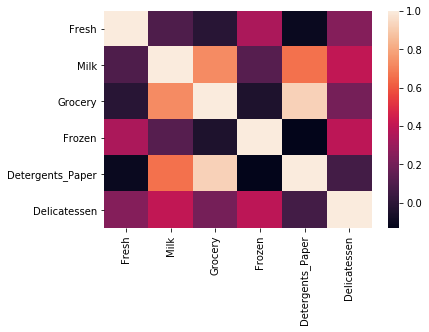

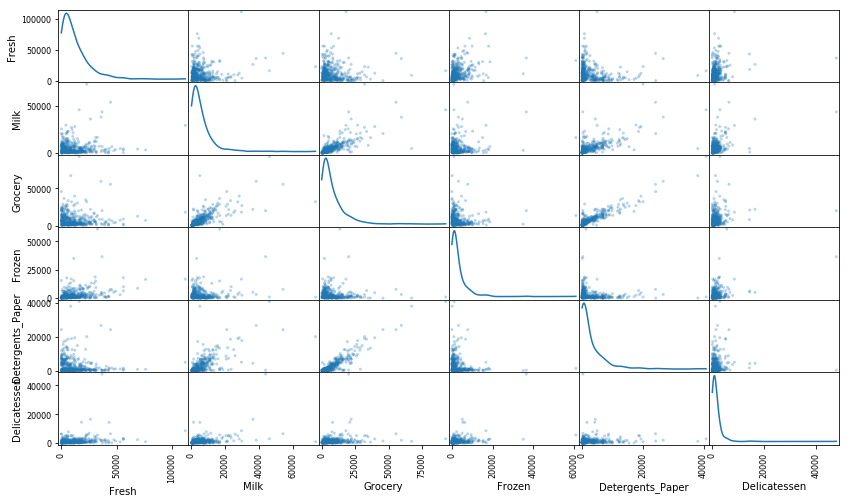

In [220]:
# Produce a scatter matrix for each pair of features in the data
ax = sns.heatmap(data.corr())

pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde'); 


### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

Looking at the heatmap quickly highlights three main correllations. In terms of highest to lowest correlation score the following observations are seen.  Grocery and Detergents_Paper, Grocery and Milk, and thirdly Detergents_pager and Milk.  

These correllations can also be seen in the scatter matrix.  Each of them show a positive correlation i.e. the more of one feature purchased, the more of another feature is purchaced.  The easiest to see being the highest correlation of Grocery to Detergents_Paper where a linear regression with the current values can be seen.  The other two correlations can be seen in the scatter matrix but with the data provided the distribution is less and so more difficult to see.  The heatmap in this instance helps provide confirmation of the correlation.

Fig showing a positive correlation
![fig. showing positive correlation](https://www.researchgate.net/profile/Young_Shin9/publication/259388428/figure/fig2/AS:202515611164676@1425294892478/The-scatter-plot-shows-the-highest-positive-correlation-between-SBP-and-S1-S2-S1-first.png)

This corroborates the test score previously seen with the test DecisionTreeRegressor score of 0.6799, that the Detergents_Paper data has high correlation to other features and does not provide additional insight.

When looking at other charts in the scatter matrix it looks as though Deli spending is reasonably consistent with little variance.  That being, the more someone spends on another feature such as Fresh, Milk, Grocery, Frozen, Detergents_Paper, there is little increase in Deli spending (in comparrison to other features the data is closer to zero).  A correlation may be masked by the small variaance and normalising the data may be of use, though the heatmap shows little correlation.

For other features, there appears to be little correlation with pairs clustering within similar regions indicating a similar spend range.  For example excluding outliers, Fresh and Milk spends look to be similar when taking the data samples as a whole. Initially the other features would not look to have a direct correlation. 

The data does not look appear to be a normal distribution.  However; it could be a log-normal distribution.  The data in its current form appears to be skewed right but this could change in a density chart if the data was scaled.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

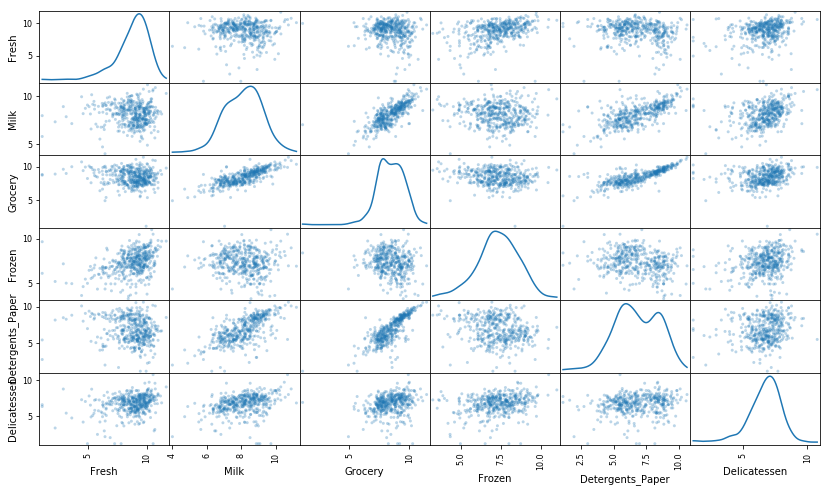

In [6]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [7]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372



Duplicate data points found in outliers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442



Good_data described


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,8.766671,8.128376,8.460236,7.324601,6.799008,6.694349
std,1.423133,1.062911,1.046108,1.261038,1.684562,1.261066
min,1.098612,4.718499,5.384495,3.218876,1.098612,1.098612
25%,8.073389,7.364809,7.676010,6.647029,5.560615,6.019808
50%,9.055439,8.198089,8.467372,7.340187,6.700731,6.874198
75%,9.737108,8.877379,9.274768,8.177371,8.277644,7.509609
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768



Log_Data described


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


Removing all outliers
Removing duplicate outliers


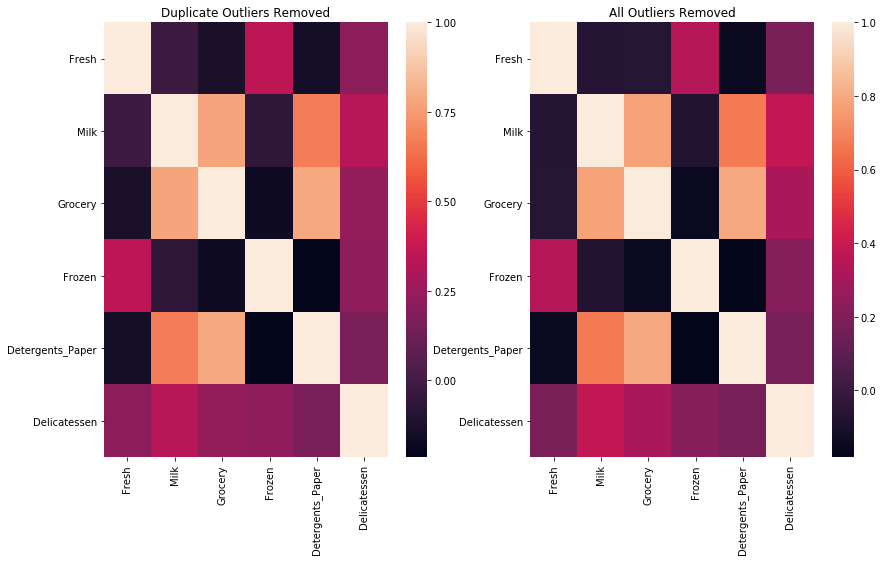

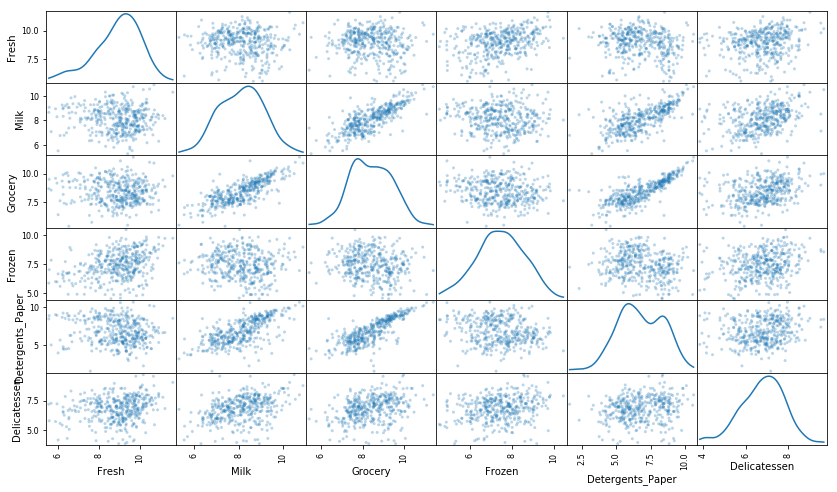

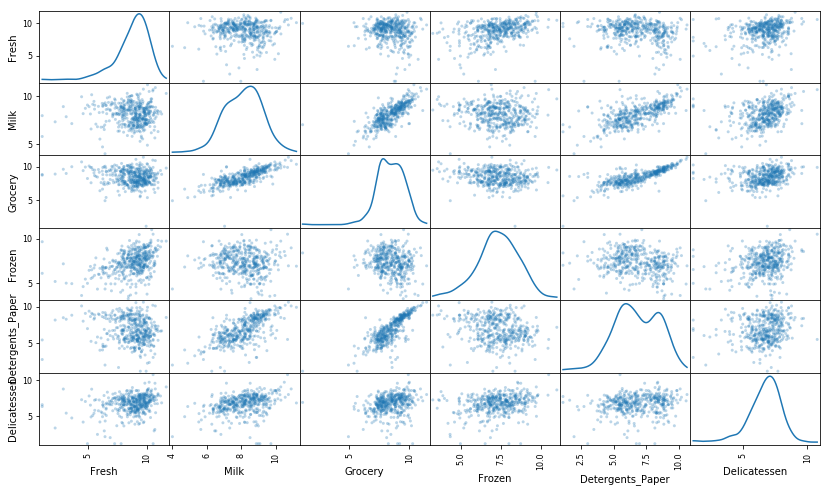

In [226]:
# For each feature find the data points with extreme high or low values
outliers = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers.extend(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values)
    
# OPTIONAL: Select the indices for data points you wish to remove
drop_all = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

outliers = list(set([x for x in outliers if outliers.count(x) > 1]))  
print "\nDuplicate data points found in outliers"
display(log_data.iloc[outliers])

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
# print len(log_data)
# print len(good_data)
# print len(drop_all)
# display(good_data.corr())
# display(drop_all.corr())

fig, ax =plt.subplots(1,2, figsize=(14,8))
sns.heatmap(good_data.corr(), ax=ax[0]).set_title('Duplicate Outliers Removed')
sns.heatmap(drop_all.corr(), ax=ax[1]).set_title('All Outliers Removed')
fig.show()

print "\nGood_data described"
display(good_data.describe())

print "\nLog_Data described"
display(log_data.describe())

pd.plotting.scatter_matrix(drop_all, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

There are a number of data points which match the definition as an outlier.  

| Feature| Number of Outliers |
| --- | --- |
| Fresh | 16 |
| Milk | 4 |
| Grocery | 2 |
| Frozen | 10 |
| Detergents_Paper | 2 |
| Delicatessen | 14 |

The majority of outliers are in the Fresh, Frozen and Delicatessen features.  When we review the correlation and heatmaps with all outliers removed, the values and heatmaps remain similar.  In fact those three features do not score as highly in correllation when compared to other features (Milk, Grocery, Detergents_Paper) whether the outliers are removed or left.  

As such I don't think removing all outliers will be necessary for classification.  However;  where we see outliers in two or more features, I have chosen to remove them.  There are only 5 of these as shown in the table.  If k-means clustering is used, these outliers could potentially affect how the cluster are created by having the centrum points where we would not necessarily expect.  

![Sensitivity to outliers with k-means](https://www.researchgate.net/profile/Phil_Trinder/publication/3949444/figure/fig3/AS:279646978494466@1443684443203/Sensitivity-of-k-means-to-initialization-and-outliers.png)

With the scatter_matrices provided you can see that removing all outliers removes a good proportion of the tails (first matrix chart), and that removing just the duplicate outliers has little change (last matrix chart).  

Since we are not performing a regression with the data, I have left the none-duplicate outliers in the data, and only removed those few where the outliers are reported in one or more features.

These duplicate outliers show log values below the Inter Quartile Range rather than exceeding.  As such it would suggest that the customers here buy less products from the wholesaler.  This could be because they tend not to use this wholesaler often, that they are a small business, or potentially even someone who has a wholesale account but uses it domestically.  The small purchase volume would be of less interest to the wholesaler and their inclusion could affect the categorisation of the data as a whole.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

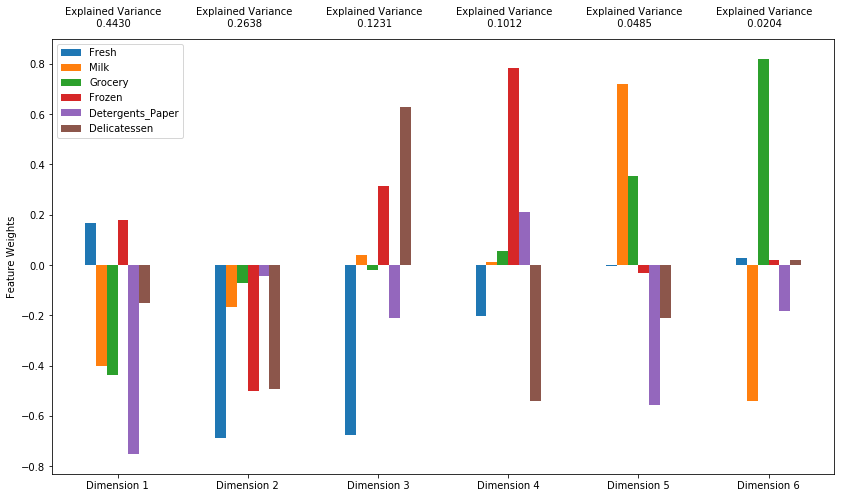

In [11]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# print pca.components_
# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

- The first and second principal components explain 0.7068 of the variance.
- The first four principal components explain 0.9311 of the variance.
- Cumulative Variance
  - As we saw with the correlation scores and heatmap visualisations, Detergents_Paper, Grocery and Milk have the highests scores.  By weighting these three features higher, they have been used to create the principal component which has the highest degree of variance with a score of 0.4430
  - The second principal component places higher weighting of Fresh, Frozen and Delicatessen.  Again this can be seen with the heatmap and correlation scores.  The correleation scores were lower that those of the primary weighted items of the first dimension, and this is reflected in the *Explained Variance* score of 0.2638. 
  - Beyond the first and second principal components, the features used score lower in the correlation and heatmap charts but were still greater than 0.  This shows some, albeit slight correlation and reflects the small improvement in *Explained Variance*.  Beyond the 4th Dimension the Explained Variance scores are poor and reflect what we saw in the correlation scores and heatmap representations. 
  -  Using the four principal components shows that a very high percentage of the variance (0.9311) can be explained.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [13]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))
# display(log_samples)


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.5023,6.0080,5.0055,0.3870,0.8576,0.3129
1,-2.1899,-4.8605,0.0008,0.4827,0.5041,-0.1988
2,-0.7286,-4.2802,1.2473,1.6688,0.8004,0.1030


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [181]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [182]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.5023,6.0080
1,-2.1899,-4.8605
2,-0.7286,-4.2802


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

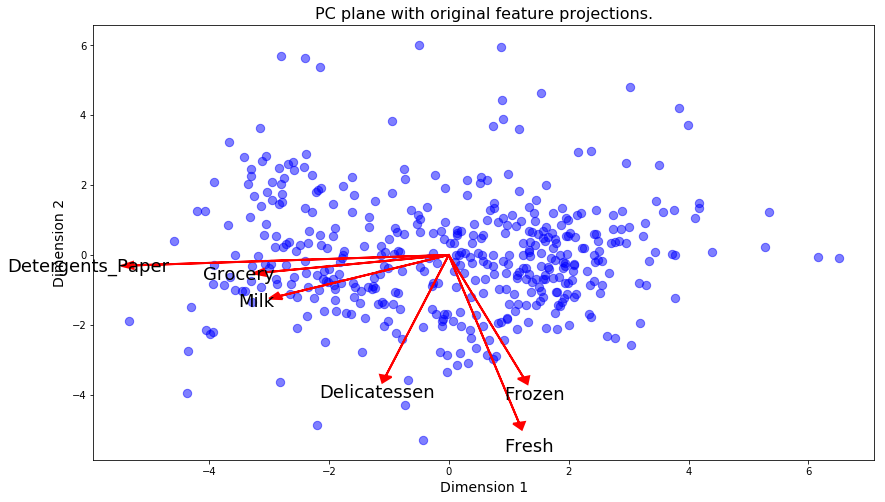

In [30]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
## Clustering Comparison

|Method name 	|Parameters 	|Scalability 	|Usecase 	|Geometry (metric used)|
|--|--|--|--|--|
|K-Means 	|number of clusters 	|Very large n_samples, medium n_clusters with MiniBatch code 	|General-purpose, even cluster size, flat geometry, not too many clusters 	|Distances between points|
|Gaussian mixtures |	many 	|Not scalable 	|Flat geometry, good for density estimation |	Mahalanobis distances to centers|


## K-Means Clustering Advantages
- K-means is an easy to implement, highly scalable algorithm which can be computationally faster than other methods, particularly if there are a high number of features. 
- It will tend to produce spherical groupings as covariance is close to 0.
- The groupings made with k-means are *hard* clustering.  That is, a data point can only be a member of one cluster, not more than one.

![k-means example](https://ds055uzetaobb.cloudfront.net/image_optimizer/cbf93bb1950c81ebac3c8bf8a473fa0d60f41bbb.png)

## Gaussian Mixture Model Clustering Advantages
- Gaussian Mixture model has the ability to be more flexible in terms of *cluster covariance* in that clusters can be created across elongations and rotations.  Whereas k-means grouping is more *spherical* in grouping as covariance approaches 0.
- Gaussian Mixture Models allow for mixed membership or *soft* clustering.  In that a data point can be a member of multiple clusters, but shows a probability of that data belonging to a particular cluster.  However, if there are few samples within a mixed cluster it can become difficult to determine.
-  The Alogrithm is one of the fastest learning for mixture models


![Sample Gaussian Mixture model clusters](http://scikit-learn.org/stable/_images/sphx_glr_plot_gmm_covariances_001.png)



## K-Means selection
k-means will be chosen as the clustering algorithm.  We are not concerned particularly with a soft clustering method of a probablility of a customer being in one group or another.  We would like to differentiate customers into the optimum number of groups as required.  As such this should be more accurate than using a Gaussian Mixture Model.

### references:
[Quora](https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm)

[sklearn GMM](http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html)

[sklearn Clustering](http://scikit-learn.org/stable/modules/clustering.html)


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

best silhouette score is with
   n_components     score
0             2  0.426281

All silhouette scores from 2 to 19 components


[[2, 0.42628101546910829],
 [3, 0.39689092644980506],
 [4, 0.33184127600936947],
 [5, 0.34999779752629756],
 [6, 0.365885220632998],
 [7, 0.36480120797880017],
 [8, 0.36764075649149885],
 [9, 0.35987901460536142],
 [10, 0.36415528051550899],
 [11, 0.35845289220946158],
 [12, 0.34882871046605635],
 [13, 0.36511207410138913],
 [14, 0.36040790365243119],
 [15, 0.34833965187651528],
 [16, 0.35795235857326274],
 [17, 0.35073938832756096],
 [18, 0.35706912693674525],
 [19, 0.34315355944722886]]

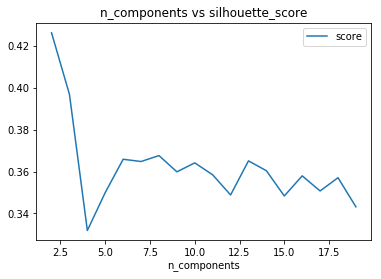

In [229]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
components = 20
silhouette_scores = []
for n_size in range (2,components):
    clusterer = KMeans(n_clusters=n_size, random_state=42)
    clusterer.fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    silhouette_scores.append([n_size,score])

ss_results = pd.DataFrame(silhouette_scores, columns = ['n_components','score'])
print "best silhouette score is with\n",ss_results.loc[ss_results.score == ss_results.score.max()]
ss_results.plot(x='n_components', y='score', title='n_components vs silhouette_score')

print "\nAll silhouette scores from 2 to 19 components"
display (silhouette_scores)

#Using n_components at 2
clusterer = KMeans(n_clusters=2, random_state=42)
clusterer.fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

Sample scores

|N_clusters|Silhouette score|
|---|---|
|2 | 0.42628101546910829|
|3 | 0.39689092644980506|
|4 | 0.33184127600936947|
|5 | 0.34999779752629756|

As shown in the table and the chart, the best silhouette score is seen when we use 2 clusters with a score of 0.42628

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

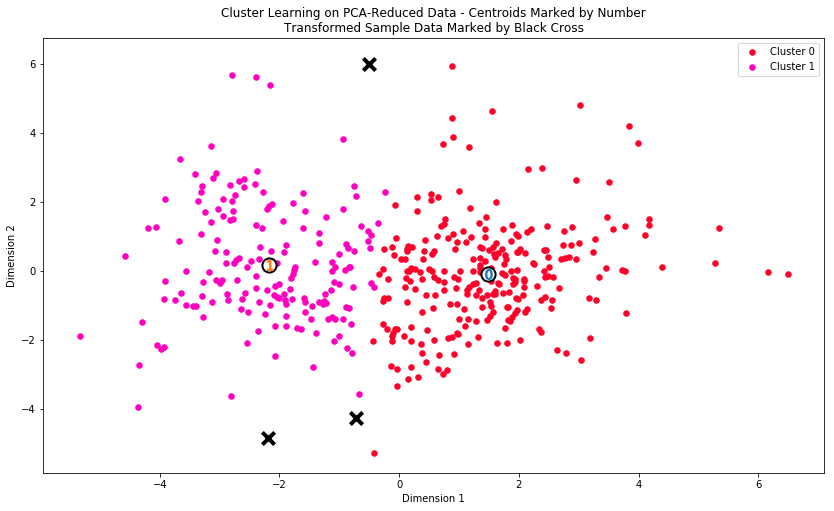

In [92]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [103]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)
# print 'with two dimensions/principle components \n',centers
# print 'when transformed back to log values of all 6 features \n',log_centers


# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)
# print 'when transformed back to original data type \n',true_centers
# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

The following data description was taken at the beginning of this project:

  | Stat     | Fresh 	     |   Milk 	   |     Grocery 	|    Frozen 	  |      Detergents_Paper |	Delicatessen |
       |--|--|--|--|--|--|--|
|mean 	|12000.297727 |	5796.265909 	|7951.277273 |	3071.931818 |	2881.493182 	|    1524.870455|

The centre of Segment 0 shows below average purchaces across all segments.  This would indicate a smaller customer or one that purchaces less from the wholesaler.  Total sales of segment 0 are 16304 m.u which is around half the totals sales of the mean customer (33223 m.u).  When comparing this alongside the BiPlot and the first two principal components.  Less purchases of Detergents_Paper, Grocery and Milk and more of Frozen and Fresh would place a customer into cluster 0.  With the ratio of items purchased and the low spend, I would suggest that the customer was a small Cafe.

The centre of Segment 1 shows less than average sales of Fresh Frozen and Delicatessen, but above average in all other segments.  The total sales of the customer in Segment 1 (30558 m.u) is similar top the mean customer total sales of 33223 m.u.  Again looking at the principal component weightings, this particular client has a greater spend than average for Milk, Grocery, Detergents_Paper, and less so for Fresh and Frozen which places this customer into cluster 1.  With the purchase volumes and the ratio of items purchased I would suggest that the customer is a shop selling groceries.

Overall it appears that the k-means clustering is placing customers into one of two groups, namely cafes/Restaurants or shops/delicatessens


### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [104]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

('Sample point', 0, 'predicted to be in Cluster', 1)
('Sample point', 1, 'predicted to be in Cluster', 1)
('Sample point', 2, 'predicted to be in Cluster', 1)


**Answer:**

Below are the sample data in original form

|Number |Fresh |	Milk |	Grocery |	Frozen |	Detergents_Paper |	Delicatessen|
|--|--|--|--|--|--|--|
|0 |	3 |	2920 	|6252 	|440 	|223 |	709|
|1 |	112151 	|29627 	|18148 	|16745 	|4948 	|8550|
|2 |	32717 |	16784 	|13626 	|60869 	|1272 	|5609|

Mean Value Description

| Stat     | Fresh 	     |   Milk 	   |     Grocery 	|    Frozen 	  |      Detergents_Paper |	Delicatessen |
       |--|--|--|--|--|--|--|
|mean 	|12000.297727 |	5796.265909 	|7951.277273 |	3071.931818 |	2881.493182 	|    1524.870455|

k-means clustering predicted that all three samples would be in Group 1, which we defined previously as a shop/delicatessen.  

I would agree with this classification, certainly for samples 1 and 2 which have large volumes of Detergents_Paper and Grocery purchases.  Though sample 1 and 2 also purchased a lot of Fresh and Frozen items (much above the mean), I would classify these as large shops.  

Sample 0 looks to be a smaller shop.  Though all sales are below average there are a large number of Grocery sales in comparisson to other sections and this classification would make sense.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

Reducing the delivery service from 5 days down to 3 would affect customers in different ways.  Primarily it would affect the customers who purcase more Fresh items.  This could have an adverse effect on the quality of the goods supplied and the quality of the end product the client provides.  As such, it would be preferable to change the delivery service for those customers who purchase less Fresh items.  Based on the two cluster groupings we have, it would be the cafes and restaurants which would likely suffer the most from the reduction in delivery service.  

A/B testing by choosing a sample group from each cluster and changing the delivery service to 3 days would be able to confirm.  The hypothesis being, reducing the service delivery days for the group we have identified as shops/delicatessens would be acceptable and not for the group we labeled cafes/restaurants only who rely more on Fresh items.


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

There are multiple methods in which additional customers could be classified to determine their delivery service.  

We have suggested that one customer segment (cafes/restaurants) would prefer more frequent delivery times based on their need for Fresh ingredients.  We could continue to predict whether a customer belongs to a cafe/restaurant or a shop/delicatessen.  This could be achieved by providing the estimated sales into the predict function of the k-means classifier which we have fitted to current customers.

Alternatively we could apply supervised learning with the Target being the cluster group 0 or 1.  We can train with the current customers.  Applying a classifier such as Naive Bayes, Support Vector Machine, Decision Tree against new customers to predict whether they would belong to group 0 or 1.



### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

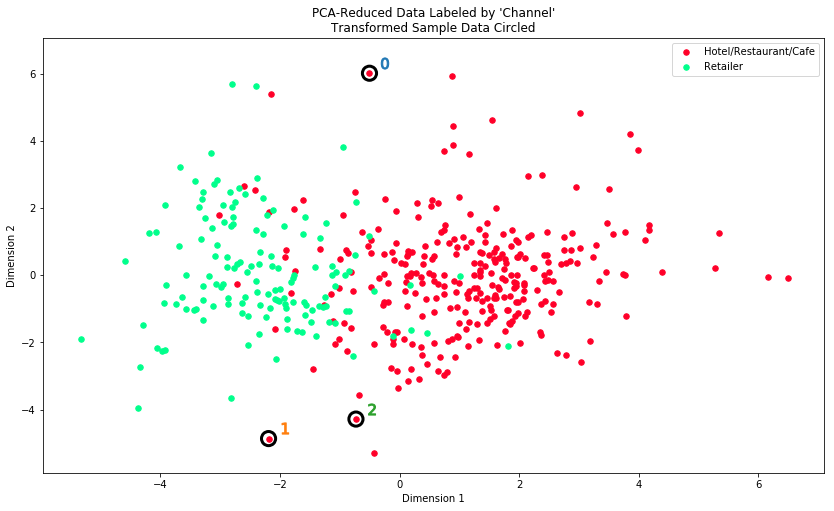

In [188]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

- The k-means cluster algorithm broke down the groups into two clusters as this recorded the highest silhouette score.  This matches the 'Channel' feature which breaks the customers into two groups 'HoReCa' or 'Retail'.  I had labeled the groups 'Cafe/Restaraunt' and 'Shop/Delicatessen'.
- There are some customers whose classifications can be clearly identified bu this distribution.  Those sit to the far left (Retailer) and far right (HoReCa), with some overlap inbetween.  Because the silhouette scores were best with two groups with k-means, possibly a Gaussian Mixture Model could assist in predicting those less easy to define customers which tend to sit in the centre.
- All three samples had been predicted as 'Shop/Delicatessen' which agrees with the classification set in the 'Channel' feature of 'HoReCa'.  The samples chosen were not necessarily the easiest to classify when you consider where they plot.  However; the classifier accurately predicted them with the dimensionality reduction to two principal components and the large explained variance of the two at 0.7068

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.